In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

**IDENTIFIKASI DATA**

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train.shape

(891, 12)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test.shape

(418, 11)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**VISUALISASI DATA**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def barchart(column):
  count = train[column].value_counts()

  index = count.index
  values = count.values

  fig = plt.figure(figsize=(10,5))
  plt.bar(index, values, color = 'blue', width = 0.7)

  plt.show()

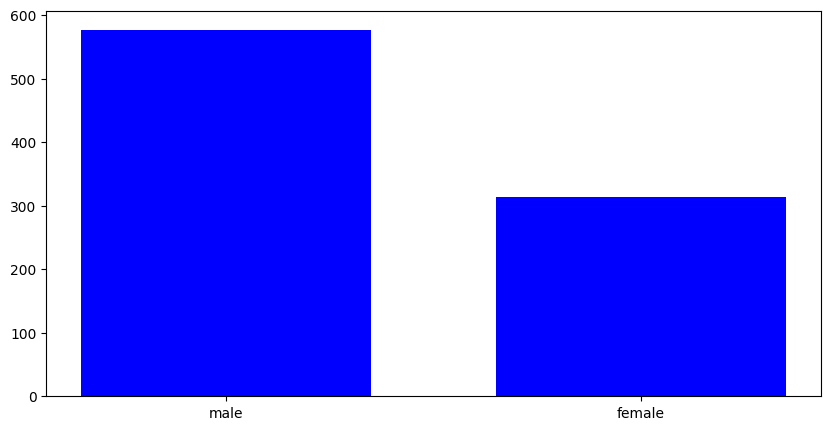

In [ ]:
barchart("Sex")

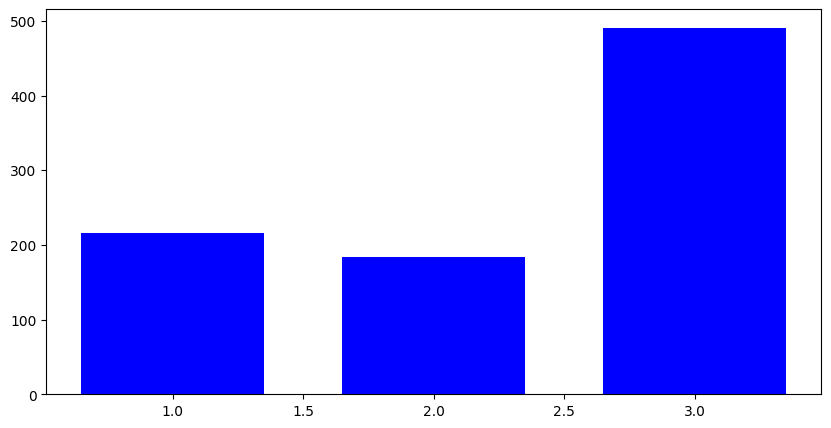

In [ ]:
barchart('Pclass')

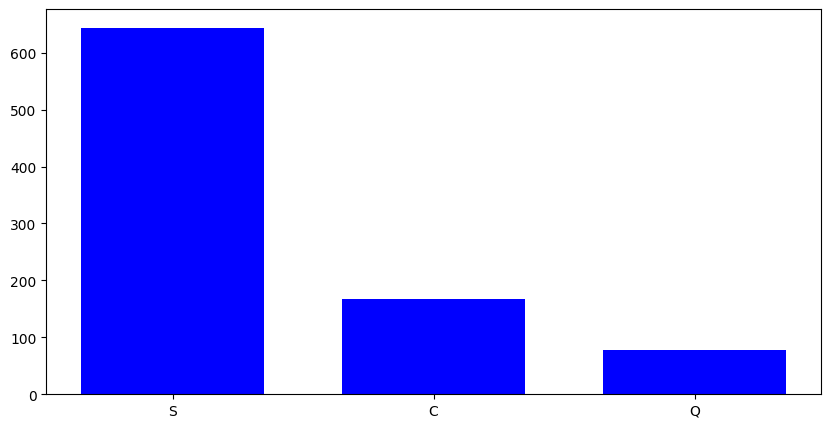

In [ ]:
barchart("Embarked")

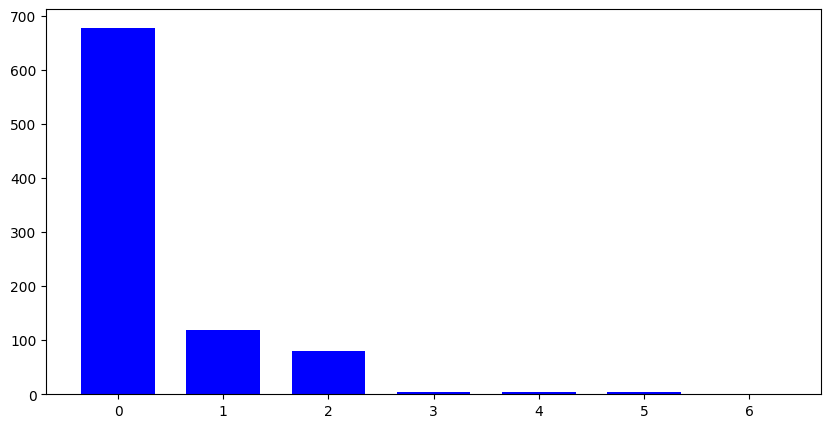

In [ ]:
barchart("Parch")

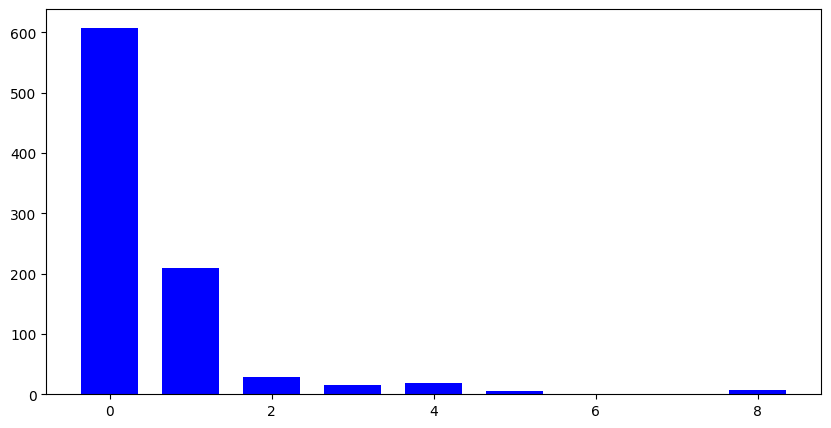

In [ ]:
barchart("SibSp")

In [ ]:
# Fungsi Untuk Menggabungkan barchart
def group_barchart(column):
  survived = train.groupby(["Survived", column]).count()["PassengerId"].reset_index()

  g = sns.catplot(
      data = survived, kind = "bar",
      x = "Survived", y = "PassengerId", hue = column,
      palette = "dark", height = 6
  )

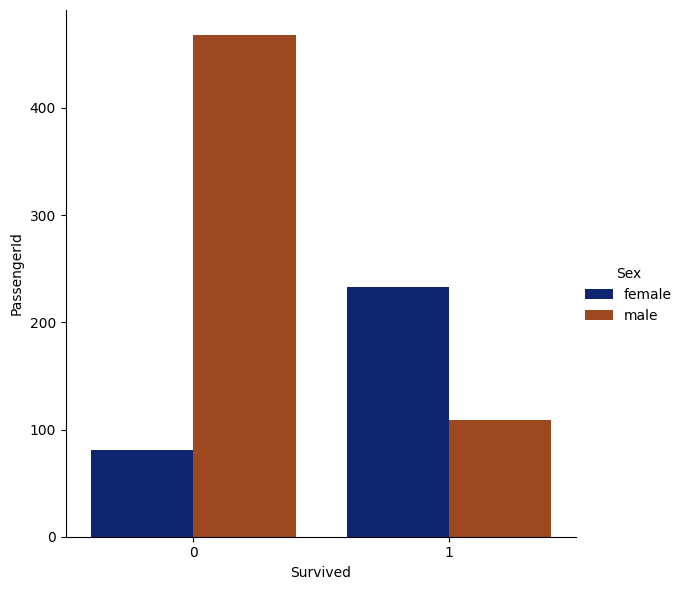

In [ ]:
group_barchart("Sex")

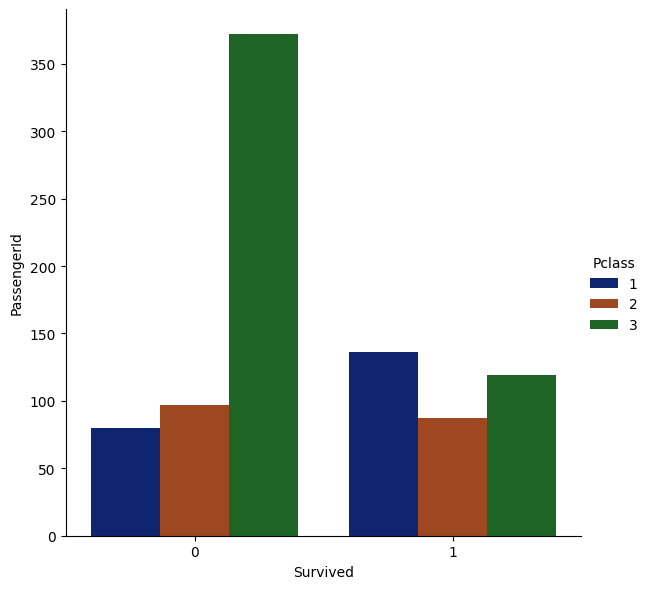

In [ ]:
group_barchart("Pclass")

**HISTOGRAM**

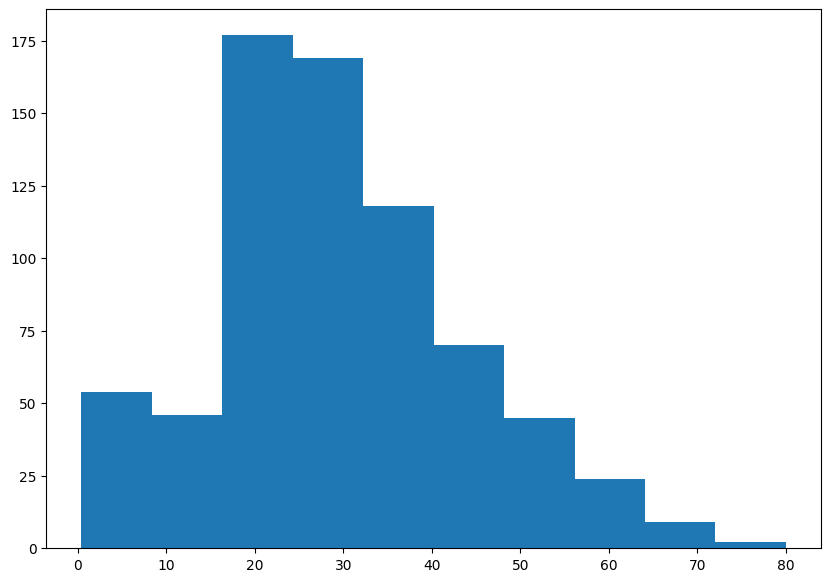

In [ ]:
fig, ax = plt.subplots(figsize = (10,7))
ax.hist(train.Age)

plt.show()


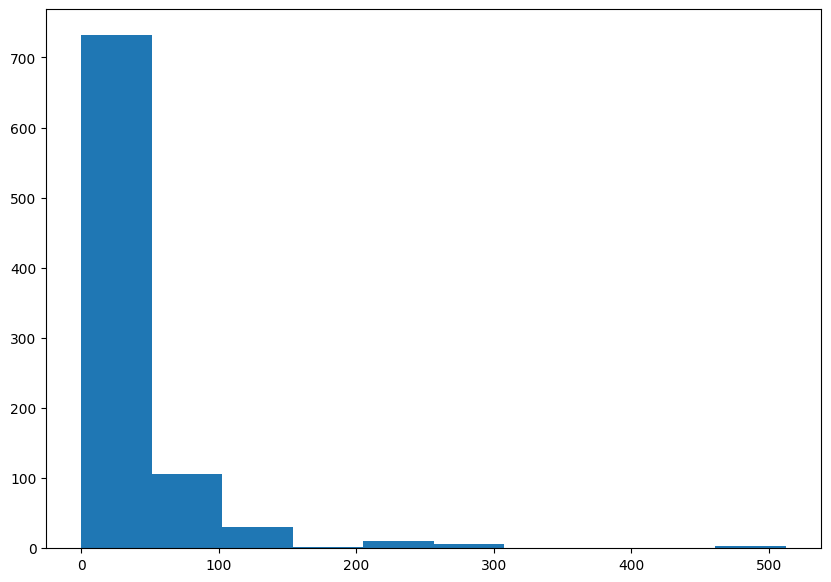

In [ ]:
fig, ax = plt.subplots(figsize = (10,7))
ax.hist(train.Fare)

plt.show()

**PREPROCESSING DATA**

**Mengisi Missing Value**

In [ ]:
train.shape, test.shape

((891, 12), (418, 11))

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# Mengecek Missing Value Embarked

train[train["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
mode_embraked = train['Embarked'].mode()[0]
mode_embraked

'S'

In [ ]:
train['Embarked'] = train['Embarked'].fillna(mode_embraked)

In [ ]:
train[train["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
mean_age = train['Age'].mean()
mean_age

29.69911764705882

In [ ]:
train['Age'] = train['Age'].fillna(mean_age)

In [ ]:
mean_age = test['Age'].mean()
mean_age

30.272590361445783

In [ ]:
test['Age'] = test['Age'].fillna(mean_age)

In [ ]:
mean_fare_test = test['Fare'].mean()
test['Fare'] = test['Fare'].fillna(mean_fare_test)

In [ ]:
# Menghilangkan Data Cabin karena hampir semua datanya kosong

In [ ]:
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

In [ ]:
# mengecek kembali apakah masih ada data yang kosong (null)

In [ ]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**CONVERT DATA TO NUMBERIC**

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
sex_mapping = {"male" : 0, "female" : 1}

train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,S


In [ ]:
# Convert Data Embarked

embarked = train[['Embarked']]

dummies = pd.get_dummies(embarked)

dummies.head()


,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [ ]:
# Mengabungkan Hasil Convert Embarked kedalam tabel

train = pd.merge(train.reset_index(), dummies.reset_index())

train.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,0,0,1
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,1,0,0
2,2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,0,0,1
4,4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,0,0,1


In [ ]:
train = train.drop(["index","Embarked"], axis = 1)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,1


In [ ]:
embarked_test = test[['Embarked']]

dummies_test = pd.get_dummies(embarked_test)

dummies.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [ ]:
test = pd.merge(test.reset_index(),  dummies_test.reset_index())
test = test.drop(['index', 'Embarked'], axis = 1 )
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,0,1,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0,0,1


In [ ]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)

title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2,
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

train['Title'] = train['Title'].map(title_mapping)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,0,0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,0,1,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,1,0


In [ ]:
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)
test['Title'] = test['Title'].map(title_mapping)

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0,0,1,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,0,1,0,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0,0,1,2


**SELECT COLUMN**

In [ ]:
train.shape, test.shape

((891, 14), (418, 13))

In [ ]:
# Menghilangkan data PassengerId, Name, Ticket karena tidak dipake untuk modelling
train = train.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)
test = test.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,0,3,0,22.0,1,0,7.2500,0,0,1,0
1,1,1,1,38.0,1,0,71.2833,1,0,0,2
2,1,3,1,26.0,0,0,7.9250,0,0,1,1
3,1,1,1,35.0,1,0,53.1000,0,0,1,2
4,0,3,0,35.0,0,0,8.0500,0,0,1,0


In [ ]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,3,0,34.5,0,0,7.8292,0,1,0,0
1,3,1,47.0,1,0,7.0000,0,0,1,2
2,2,0,62.0,0,0,9.6875,0,1,0,0
3,3,0,27.0,0,0,8.6625,0,0,1,0
4,3,1,22.0,1,1,12.2875,0,0,1,2


**MODELLING**

In [ ]:
train.dtypes

Survived        int64
Pclass          int64
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
Title           int64
dtype: object

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
train_data = train.drop("Survived",axis = 1 )
target = train['Survived']
k_fold = KFold(n_splits=5 , shuffle=True, random_state=0)

clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.78212291 0.78651685 0.78089888 0.8258427  0.82022472]


In [ ]:
score.mean()

0.7991212102190698

In [ ]:
k_fold = KFold(n_splits=5 , shuffle=True, random_state=0)

clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.75418994 0.80898876 0.78651685 0.7752809  0.75280899]


In [ ]:
score.mean()

0.7755570899504111

In [ ]:
k_fold = KFold(n_splits=3 , shuffle=True, random_state=0)

clf = KNeighborsClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.73400673 0.71380471 0.74074074]


In [ ]:
score.mean()

0.7295173961840629

In [ ]:
k_fold = KFold(n_splits=3 , shuffle=True, random_state=0)

clf = RandomForestClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.7979798  0.83838384 0.8013468 ]


In [ ]:
score.mean()

0.8125701459034792

In [ ]:
k_fold = KFold(n_splits=5 , shuffle=True, random_state=0)

clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.72625698 0.63483146 0.73595506 0.6741573  0.61235955]


In [ ]:
score.mean()

0.6767120708053481

**PREDICTION**

In [ ]:
clf = RandomForestClassifier()
clf.fit(train_data, target)

RandomForestClassifier()

In [ ]:
prediction = clf.predict(test)

In [ ]:
df_test = pd.read_csv("test.csv")
submission = pd.DataFrame({
    "PassengerId": df_test["PassengerId"],
    "Survived": prediction
})
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [ ]:
submission.to_csv("submit2.csv", index= False)

In [ ]:
test['Survived'] = submission['Survived']
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title,Survived
0,3,0,34.5,0,0,7.8292,0,1,0,0,0
1,3,1,47.0,1,0,7.0000,0,0,1,2,0
2,2,0,62.0,0,0,9.6875,0,1,0,0,0
3,3,0,27.0,0,0,8.6625,0,0,1,0,1
4,3,1,22.0,1,1,12.2875,0,0,1,2,1
